In [2]:
import warnings
warnings.simplefilter('ignore')
# Import common package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import Model building package
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
# Supervised
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier, export_graphviz #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier 
# Unsupervised
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
# Evaluate model performace
from sklearn import metrics #for checking the model accuracy

In [4]:
email = pd.read_csv('../data/Marketing Email Campaign/email/email_table.csv')
open_df = pd.read_csv('../data/Marketing Email Campaign/email/email_opened_table.csv')
click_df = pd.read_csv('../data/Marketing Email Campaign/email/link_clicked_table.csv')

In [6]:
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [5]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [7]:
email.describe()

,email_id,hour,user_past_purchases
count,100000.000000,100000.000000,100000.00000
mean,498690.196160,9.059300,3.87845
std,289230.727534,4.439637,3.19611
min,8.000000,1.000000,0.00000
25%,246708.250000,6.000000,1.00000
50%,498447.000000,9.000000,3.00000
75%,749942.750000,12.000000,6.00000
max,999998.000000,24.000000,22.00000


In [10]:
email.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64

In [8]:
open_df.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [13]:
click_df.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [14]:
open_df['open'] = 1
click_df['click'] = 1
data = pd.merge(left=email, right = open_df, on = 'email_id', how = 'left')
data = pd.merge(left=data, right = click_df, on = 'email_id', how = 'left')
data['open'] = data['open'].fillna(0).astype(int)
data['click'] = data['click'].fillna(0).astype(int)

In [56]:
# def weekday_rank(x):
#     weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#     for i in range(len(weekday)):
#         if x == weekday[i]:
#             return i
# data['weekday'] = data['weekday'].apply(weekday_rank)

## Answer question 1
What percentage of users opened the email?

what percentage clicked on the link within the email?

In [30]:
print('Open rate is %f' % (data['open'].mean()*100))
print('Click rate is %f' % (data['click'].sum()*100/data['open'].sum()))

Open rate is 10.345000
Click rate is 20.483325


In [33]:
group = data.groupby('click', as_index = False).agg({'email_id':'nunique'}).rename(columns={'email_id': 'count'})
group['percentage'] = group['count']*100/group['count'].sum()

## Visualize Data

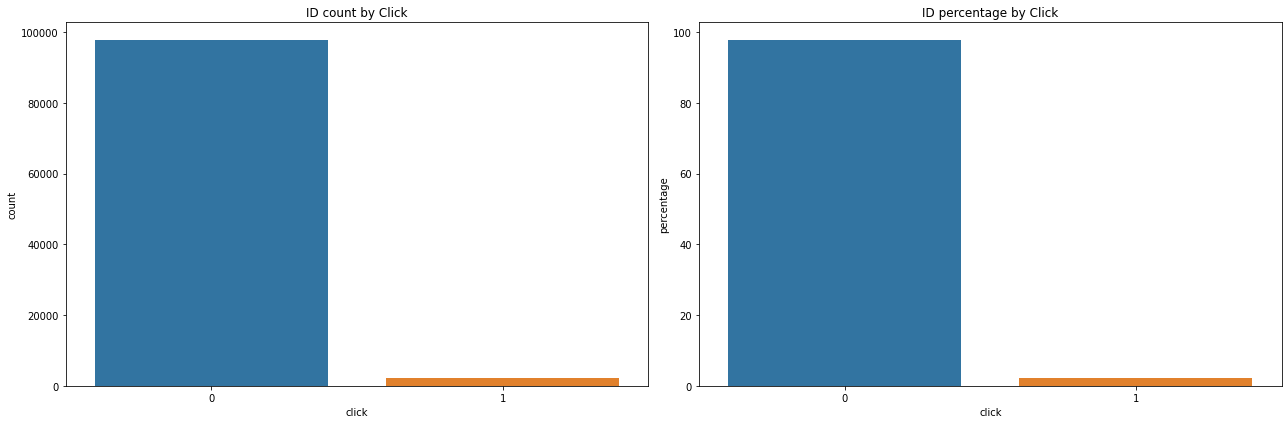

In [57]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18,6))
sns.barplot(x='click', y = 'count', data = group, ax = ax[0])
ax[0].set_title('ID count by Click')

sns.barplot(x='click', y = 'percentage', data = group, ax = ax[1])
ax[1].set_title('ID percentage by Click')

plt.tight_layout()
plt.show()

In [58]:
data.columns

Index(['email_id', 'email_text', 'email_version', 'hour', 'weekday',
       'user_country', 'user_past_purchases', 'open', 'click'],
      dtype='object')

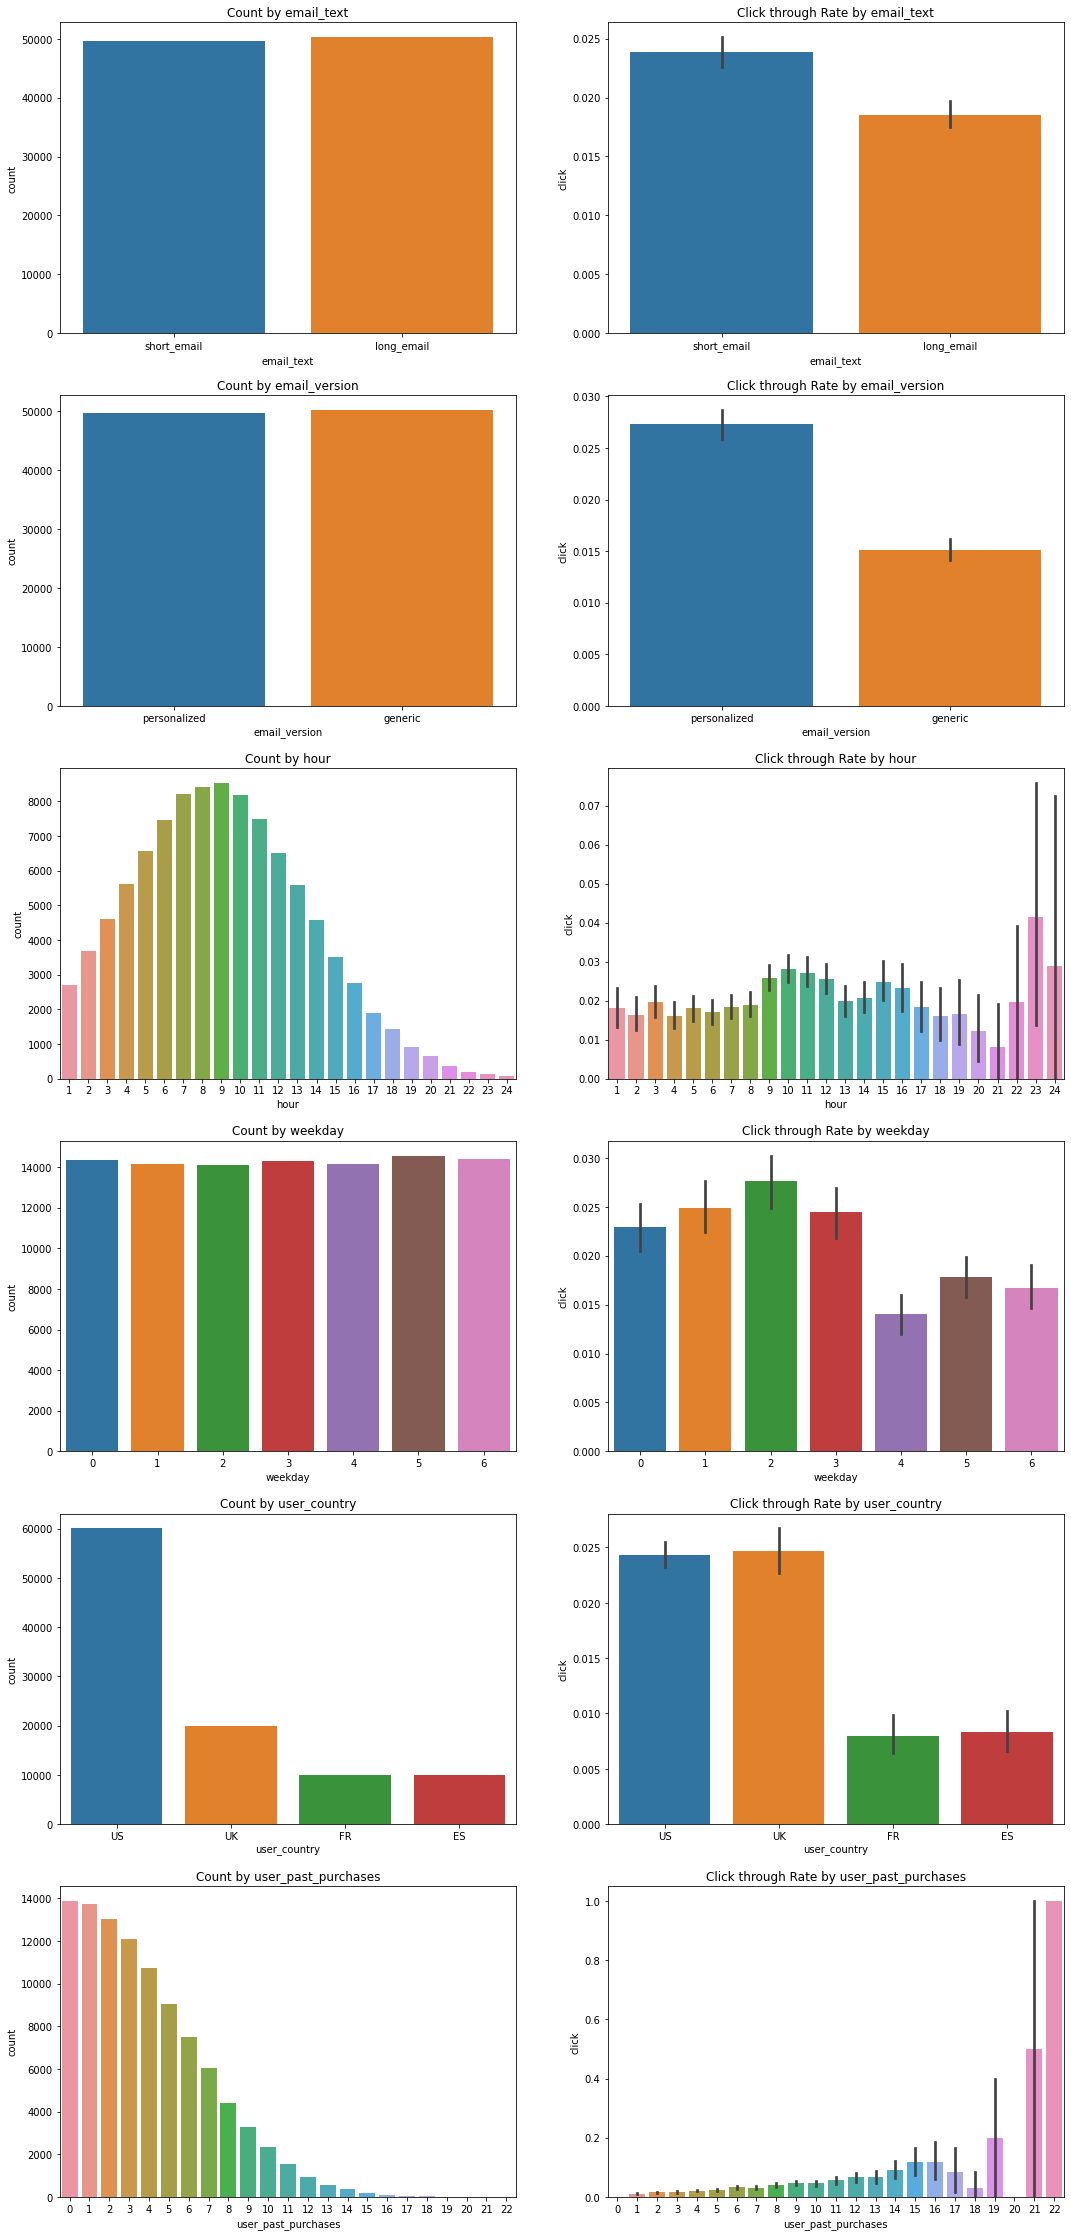

In [59]:
variable = ['email_text', 'email_version', 'hour', 'weekday','user_country', 'user_past_purchases']
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(18,40))

for index, dimension in enumerate(variable):
    sns.countplot(x=dimension, data=data, ax = ax[index, 0])
    ax[index, 0].set_title('Count by ' + dimension)
    sns.barplot(x=dimension, y = 'click', data=data, ax = ax[index, 1])
    ax[index, 1].set_title('Click through Rate by ' + dimension)

Click through rate is higher with
- short email
- personlized email
- mid night send out 
- Tuseday, Wednesday and Thursday
- English speaking country inclding US and UK
- Customer with more past purchases

## Model Building

In [61]:
df = pd.get_dummies(data, columns = ['email_text', 'email_version', 'weekday','user_country'], drop_first=True)

In [63]:
features_list = df.columns.drop(['email_id', 'open', 'click'])

In [66]:
# train, test = train_test_split(df, test_size = 0.3)
X = df[features_list]# taking the training data features
Y = df['click']# output of our training data
train_X, test_x, train_y, test_y = train_test_split(X, Y ,test_size=0.2)

### Logistic 

In [92]:
# Logistic 
lg_model = LogisticRegression()
lg_model.fit(train_X,train_y)
prediction=lg_model.predict(test_x)
print('The accuracy of the Logistic Regression Classifier is', metrics.accuracy_score(test_y, prediction))
print('The roc score of the Logistic Regression Classifier is', metrics.roc_auc_score(test_y, lg_model.predict_proba(test_x)[:,1]))
print('The precision score of Logistic Regression Classifier is', metrics.precision_score(test_y, prediction))
print('The recall score of the Logistic Regression Classifier is', metrics.recall_score(test_y, prediction))
print('The f1 score of the Logistic Regression Classifier is', metrics.f1_score(test_y, prediction))


The accuracy of the Logistic Regression Classifier is 0.9773
The roc score of the Logistic Regression Classifier is 0.72767820719766
The precision score of Logistic Regression Classifier is 0.0
The recall score of the Logistic Regression Classifier is 0.0
The f1 score of the Logistic Regression Classifier is 0.0


### Decision Tree

In [100]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(train_X,train_y)
prediction=dt_model.predict(test_x)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(test_y, prediction))
print('The roc score of the Decision Tree is', metrics.roc_auc_score(test_y, dt_model.predict_proba(test_x)[:,1]))
print('The precision score of the Decision Tree is', metrics.precision_score(test_y, prediction))
print('The recall score of the Decision Tree is', metrics.recall_score(test_y, prediction))


The accuracy of the Decision Tree is 0.97725
The roc score of the Decision Tree is 0.6944969643506721
The precision score of the Decision Tree is 0.0
The recall score of the Decision Tree is 0.0


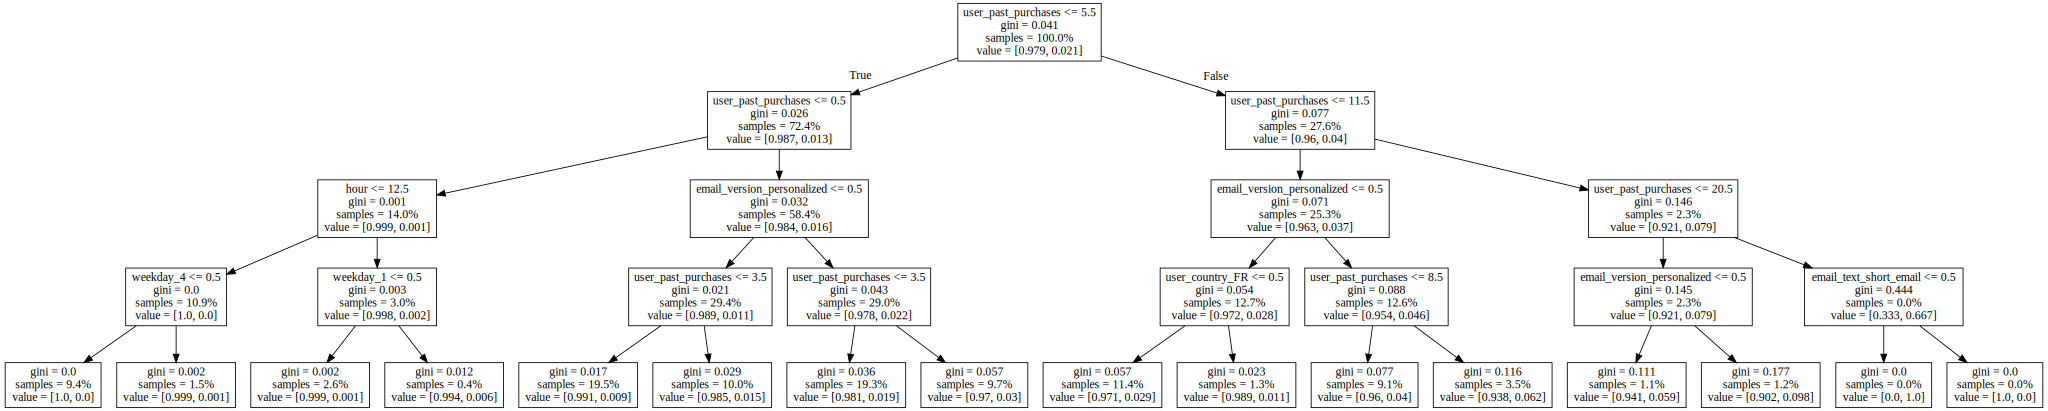

In [101]:
import graphviz
dot_data = export_graphviz(dt_model,feature_names=features_list,proportion=True,leaves_parallel=True)
from IPython.display import display
display(graphviz.Source(dot_data))

### Random Forest

In [102]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(train_X,train_y)
prediction=rf_model.predict(test_x)
print('The accuracy of the Random Forest Classifier is', metrics.accuracy_score(test_y, prediction))
print('The roc score of the Random Forest Classifier is', metrics.roc_auc_score(test_y, rf_model.predict_proba(test_x)[:,1]))
print('The precision score of Random Forest Classifier is', metrics.precision_score(test_y, prediction))
print('The recall score of the Random Forest Classifier is', metrics.recall_score(test_y, prediction))
print('The f1 score of the Random Forest Classifier is', metrics.f1_score(test_y, prediction))



The accuracy of the Random Forest Classifier is 0.9749
The roc score of the Random Forest Classifier is 0.5596596710076444
The precision score of Random Forest Classifier is 0.11290322580645161
The recall score of the Random Forest Classifier is 0.015418502202643172
The f1 score of the Random Forest Classifier is 0.027131782945736434


hour       | 0.44817
user_past_purchases | 0.37665
email_text_short_email | 0.03227
email_version_personalized | 0.01989
weekday_1  | 0.01784
weekday_3  | 0.01571
user_country_UK | 0.01562
user_country_US | 0.01475
weekday_2  | 0.01415
weekday_5  | 0.01409
weekday_6  | 0.01293
weekday_4  | 0.01157
user_country_FR | 0.00636


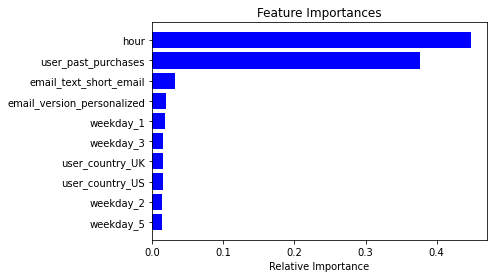

In [103]:
# Feature importance
importance = sorted(zip(features_list, rf_model.feature_importances_), key=lambda x:x[1], reverse=True)
for feature, val in importance:
    print('{0:10s} | {1:.5f}'.format(feature, val))
    
plt.title('Feature Importances')
plt.barh(range(len(importance[:10])), [val for feature, val in importance[:10]][::-1], color='b', align='center')
plt.yticks(range(len(importance[:10])), [feature for feature, val in importance[:10]][::-1])
plt.xlabel('Relative Importance')
plt.show()



### XGBoost

In [112]:
# XGBoost
import xgboost as xgboost
xgb_model = xgboost.XGBClassifier(max_depth = 7, objective = 'binary:logistic', eval_metric = 'logloss')
xgb_model.fit(train_X,train_y)
prediction = xgb_model.predict(test_x)

print('The accuracy of the XGBoost Classifier is', metrics.accuracy_score(test_y, prediction))
print('The roc score of the XGBoost Classifier is', metrics.roc_auc_score(test_y, xgb_model.predict_proba(test_x)[:,1]))
print('The precision score of XGBoost Classifier is', metrics.precision_score(test_y, prediction))
print('The recall score of the XGBoost Classifier is', metrics.recall_score(test_y, prediction))
print('The f1 score of the XGBoost Classifier is', metrics.f1_score(test_y, prediction))


The accuracy of the XGBoost Classifier is 0.9771
The roc score of the XGBoost Classifier is 0.6989395511593345
The precision score of XGBoost Classifier is 0.16666666666666666
The recall score of the XGBoost Classifier is 0.0022026431718061676
The f1 score of the XGBoost Classifier is 0.004347826086956523


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

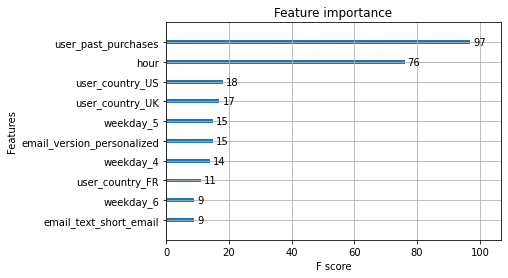

In [105]:
# Feature importance
xgboost.plot_importance(xgb_model, max_num_features=10)

In [113]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)
# Train xgboost on smoted dataset
train_X_smote, test_X_smote, train_y_smote, test_y_smote = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)
XGBmodel_smote = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, scale_pos_weight = 12, objective = 'binary:logistic', eval_metric = 'logloss')
XGBmodel_smote.fit(train_X_smote,train_y_smote)

## Predcit on the original dataset using the smote-xgboost model
prediction = XGBmodel_smote.predict(test_x)

print('The accuracy of the XGBoost Classifier with SMOTE is', metrics.accuracy_score(test_y, prediction))
print('The roc score of the XGBoost Classifier with SMOTE is', metrics.roc_auc_score(test_y, XGBmodel_smote.predict_proba(test_x)[:,1]))
print('The precision score of XGBoost Classifier with SMOTE is', metrics.precision_score(test_y, prediction))
print('The recall score of the XGBoost Classifier with SMOTE is', metrics.recall_score(test_y, prediction))
print('The f1 score of the XGBoost Classifier with SMOTE is', metrics.f1_score(test_y, prediction))


The accuracy of the XGBoost Classifier with SMOTE is 0.3409
The roc score of the XGBoost Classifier with SMOTE is 0.7396405001462719
The precision score of XGBoost Classifier with SMOTE is 0.031507656065959955
The recall score of the XGBoost Classifier with SMOTE is 0.9427312775330396
The f1 score of the XGBoost Classifier with SMOTE is 0.06097734720045591


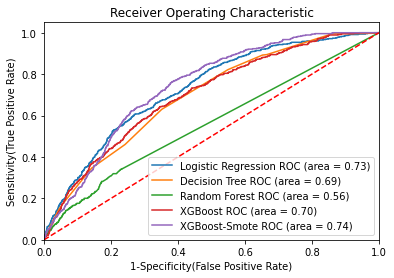

In [114]:
plt.figure()

# Add the models to the list
models = [
{
    'label': 'Logistic Regression',
    # 'model': LogisticRegression(),
    'model': lg_model,
},
{
    'label': 'Decision Tree',
    # 'model': RandomForestClassifier(),
    'model': dt_model,
},
{
    'label': 'Random Forest',
    # 'model': RandomForestClassifier(),
    'model': rf_model,
},
{
    'label': 'XGBoost',
    # 'model': xgboost.XGBClassifier(max_depth = 2, silent  = 1, objective = 'binary:logistic', eval_metric = 'logloss'),
    'model': xgb_model,
},
{
    'label': 'XGBoost-Smote',
    # 'model': xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
    #                        colsample_bytree=1, max_depth=7, scale_pos_weight = 12, objective = 'binary:logistic', eval_metric = 'logloss'),
    'model': XGBmodel_smote,
}
]

# Below for loop iterates through models list
for m in models:
    model = m['model'] # select the model
#     model.fit(train_X,train_y) # train the model
    y_pred=model.predict(test_x) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(test_y, model.predict_proba(test_x)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(test_y,model.predict_proba(test_x)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [131]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, XGBmodel_smote.predict_proba(test_x)[:,1])
fp_tp = pd.DataFrame({'fp': fpr, 'tp': tpr, 'threshold' : thresholds})
fp_tp.loc[(fp_tp['tp']>0.8) &(fp_tp['fp']<0.45)]

,fp,tp,threshold
2977,0.437378,0.803965,0.832016
2978,0.437430,0.803965,0.831962
2979,0.437532,0.803965,0.831879
2980,0.437839,0.803965,0.831712
2981,0.437941,0.803965,0.831501
...,...,...,...
3052,0.449299,0.812775,0.822901
3053,0.449401,0.812775,0.822772
3054,0.449453,0.812775,0.822714
3055,0.449657,0.812775,0.822704


In [134]:
# predict with different threshold
prediction = (XGBmodel_smote.predict_proba(test_x)[:,1] >= 0.822563).astype(bool) # set threshold as 0.3

# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(test_y, prediction))

print('The accuracy of the XGBoost Classifier with SMOTE is', metrics.accuracy_score(test_y, prediction))
print('The roc score of the XGBoost Classifier with SMOTE is', metrics.roc_auc_score(test_y, XGBmodel_smote.predict_proba(test_x)[:,1]))
print('The precision score of XGBoost Classifier with SMOTE is', metrics.precision_score(test_y, prediction))
print('The recall score of the XGBoost Classifier with SMOTE is', metrics.recall_score(test_y, prediction))
print('The f1 score of the XGBoost Classifier with SMOTE is', metrics.f1_score(test_y, prediction))


# Printing the precision and recall, among other metrics
print(metrics.classification_report(test_y, prediction))

[[10756  8790]
 [   85   369]]
The accuracy of the XGBoost Classifier with SMOTE is 0.55625
The roc score of the XGBoost Classifier with SMOTE is 0.7396405001462719
The precision score of XGBoost Classifier with SMOTE is 0.040288241074353096
The recall score of the XGBoost Classifier with SMOTE is 0.8127753303964758
The f1 score of the XGBoost Classifier with SMOTE is 0.07677103921772599
              precision    recall  f1-score   support

           0       0.99      0.55      0.71     19546
           1       0.04      0.81      0.08       454

    accuracy                           0.56     20000
   macro avg       0.52      0.68      0.39     20000
weighted avg       0.97      0.56      0.69     20000



In [137]:
print('Origin email sent out %d with %f conversion rate' % (len(test_y), sum(test_y)*100/len(test_y)))
print('Our model sent out  %d with %f conversion rate' % (sum(prediction), metrics.precision_score(test_y, prediction)*100))

Origin email sent out 20000 with 2.270000 conversion rate
Our model sent out  9159 with 4.028824 conversion rate


New model only sent out 9159 emails vs the original 20000 emails. This is 54% saving.
New model covers 81% of the true cases. 